### <strong><font color=cornflowerblue>第四次作品：以蒙地卡羅實驗驗證 J-B 檢定統計量的卡方分配與檢定力的表現</font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：

本作品通過蒙地卡羅實驗（Monte Carlo Simulation）驗證以 Skewness 為基礎的 $G_1$ 統計量（$G_1 = \sqrt{\frac{n}{6}}\hat{s} $），以 Kurtosis 為基礎的 $G_2$ 統計量（$ G_2 = \sqrt{\frac{n}{24}}(\hat{k} - 3) $）是否依據理論上服從標準常態 N(0, 1)，以及由兩者結合形成的 $G_3$ 統計量（$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\big(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\big) $）是否依據理論上服從卡方 $\chi^2(2)$，其中 $G_3$ 統計量為著名的 J-B (Jarque-Bera) 常態檢定統計量。
此外，繼續通過蒙地卡羅實驗來驗證 $G_3$ 統計量的檢定力（Power），以及與其他常態檢定的產品進行比較，如 scipy.stats 裡的 D’Agostino and Pearson’s (normaltest)、Kolmogorov-Smirnov test (kstest)、Shapiro-Wilk test (shapiro)、Anderson-Darling test (anderson) 等著名常態檢定方法，觀察它們之間的差異。


<hr>

### <strong><font color=cornflowerblue>目標一</font></strong>：通過蒙地卡羅實驗來驗證以 Skewness 為基礎的 $G_1$ 統計量，以 Kurtosis 為基礎的 $G_2$ 統計量是否服從標準常態 N(0, 1)，以及由兩者結合形成的 $G_3$ 統計量是否服從卡方 $\chi^2(2)$。

- 檢定統計量 $G_1$：
$$ G_1 = \sqrt{\frac{n}{6}}\hat{s} $$
其中 $\hat{s}$ 為偏態係數 Skewness 的估計值。

- 檢定統計量 $G_2$：
$$ G_2 = \sqrt{\frac{n}{24}}(\hat{k} - 3) $$
其中 $\hat{k}$ 為峰態係數 Kurtosis 的估計值。

- 檢定統計量 $G_3$：
$$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\bigg(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\bigg) $$
其中 $\hat{s}$ 為偏態係數 skewness 的估計值，$\hat{k}$ 為峰態係數 Kurtosis 的估計值。

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_1$ 估計值，並繪製出每個樣本數 n 的 $G_1$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的標準常態 PDF 與 CDF 圖，觀察由 $G_1$ 統計量生成的估計值與真實標準常態分配的分佈情況之間的關聯性。

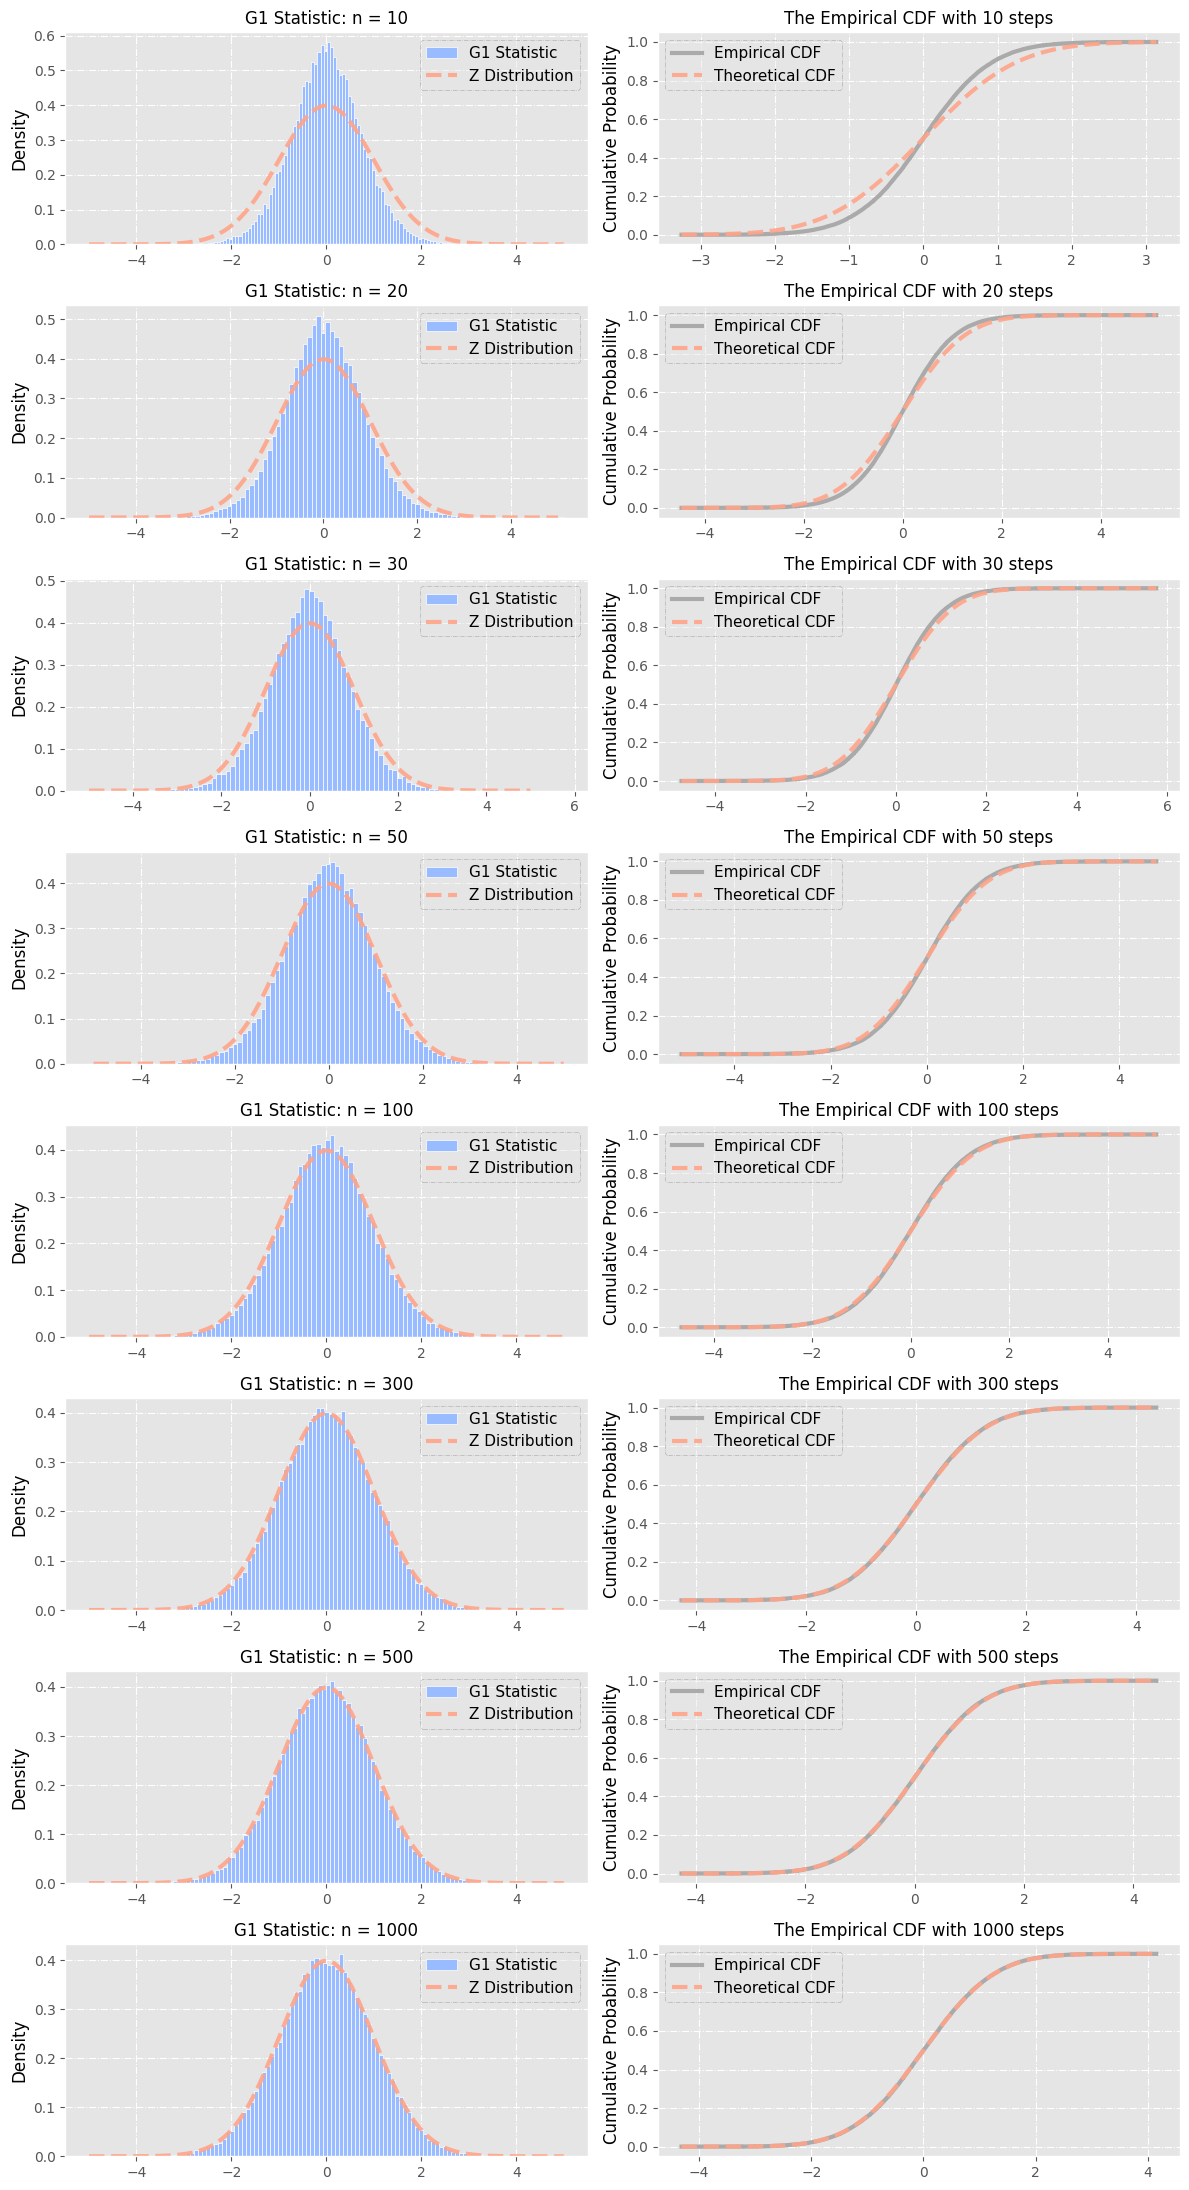

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, skew
from scipy.stats import norm

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000]
G1 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(8, 2, figsize = (12, 22))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for skewness
    x = norm.rvs(0, 1, (N, n))
    # 生成 G1 统计量
    G1 = np.sqrt(n / 6) * skew(x, axis = 1, bias = True) # compute skewness for each row

    # normal PDF
    x_pdf = np.linspace(-5, 5, 1000)
    y_pdf = norm.pdf(x_pdf, 0, 1)

    # 計算 G1 的 ECDF
    res = cumfreq(G1, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # normal CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = norm.cdf(x_cdf, 0, 1)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G1 统计量的直方图與 normal PDF
    ax_pdf.hist(G1, bins = 100, density = True, color = '#99BBFF', edgecolor = '#FFFFFF'
                , label = 'G1 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = 'Z Distribution'
                , alpha = 0.9)
    ax_pdf.set_title('G1 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')

    # G1 统计量的 ECDF 與 normal CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_1$ 統計量的分佈與標準常態分配有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。
- 隨著樣本數 n 的增加，$G_1$ 統計量的分佈逐漸趨近於標準常態分配。當樣本數 n 增加到 300 或以上時，$G_1$ 統計量的分佈與標準常態分配幾乎相同。
- 在樣本數較大的情況下，$G_1$ 統計量的分佈與標準常態分配幾乎完全重合，這表明 $G_1$ 統計量在大樣本的情況下會無限趨近於標準常態分配。
- Empirical CDF 與標準常態 CDF 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與標準常態 CDF 越來越接近，這進一步證明了 $G_1$ 統計量在大樣本的情況下會無限趨近於標準常態分配。

**<font color=lightseagreen>結論</font>**：

- 通過蒙地卡羅模擬實驗，我們驗證了以 Skewness 為基礎的 $G_1$ 統計量在樣本數較大時，如 n $\geq$ 300，其分佈會趨近於標準常態分配 N(0, 1)。
- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_2$ 估計值，並繪製出每個樣本數 n 的 $G_2$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的標準常態 PDF 與 CDF 圖，觀察由 $G_2$ 統計量生成的估計值與真實標準常態分配的分佈情況之間的關聯性。

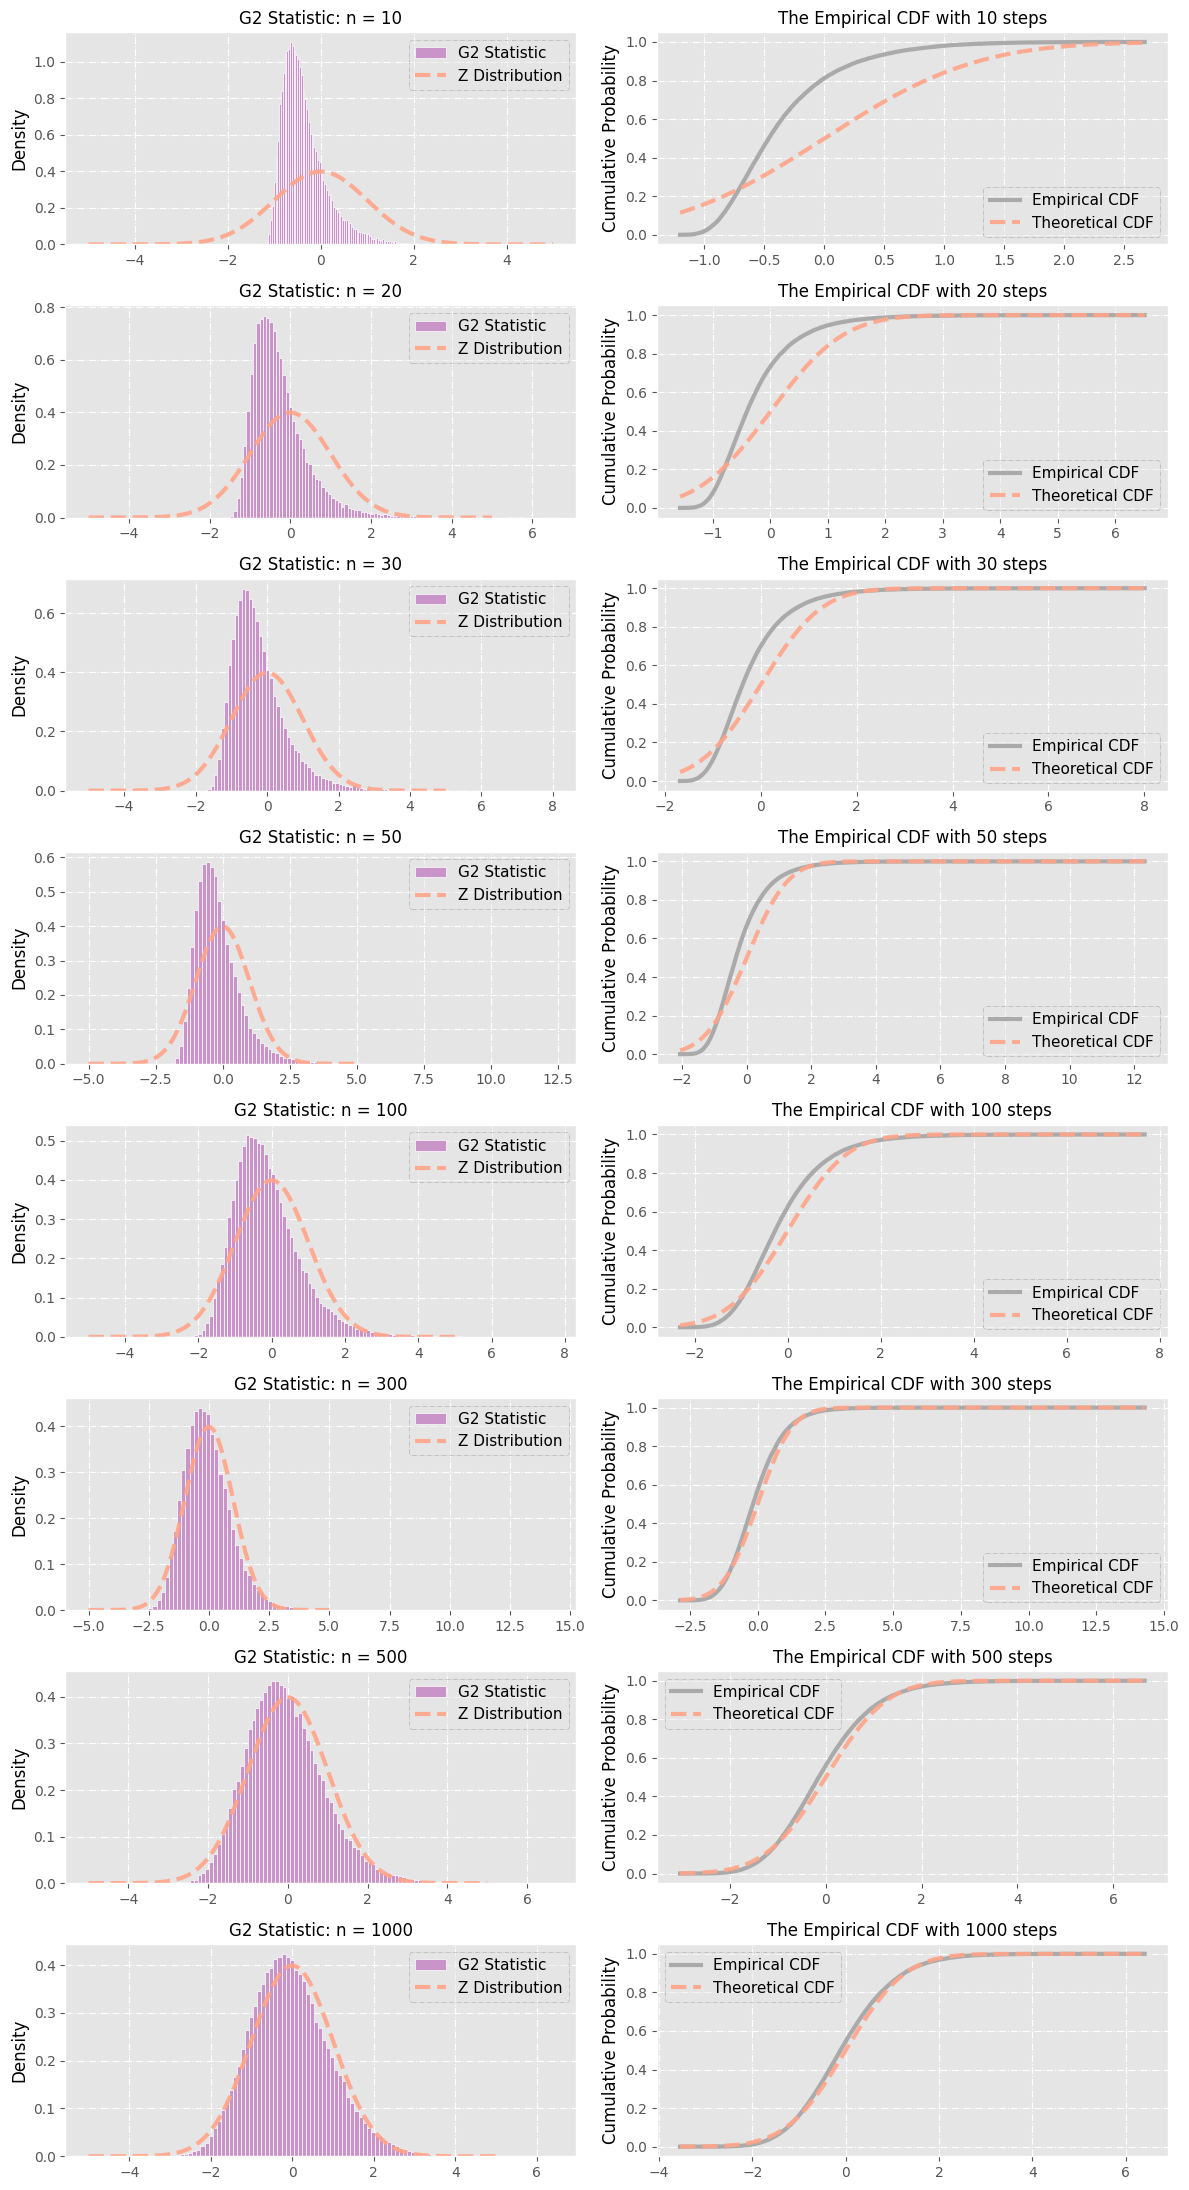

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, kurtosis
from scipy.stats import norm

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000]
G2 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(8, 2, figsize = (12, 22))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for kurtosis
    x = norm.rvs(0, 1, (N, n))
    # 生成 G2 统计量
    # G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = True, fisher = False) - 3)
    G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = True, fisher = True))

    # normal PDF
    x_pdf = np.linspace(-5, 5, 1000)
    y_pdf = norm.pdf(x_pdf, 0, 1)

    # 計算 G2 的 ECDF
    res = cumfreq(G2, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # normal CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = norm.cdf(x_cdf, 0, 1)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G2 统计量的直方图與 normal PDF
    ax_pdf.hist(G2, bins = 100, density = True, color = '#c994c7', edgecolor = '#FFFFFF'
                , label = 'G2 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = 'Z Distribution'
                , alpha = 0.9)
    ax_pdf.set_title('G2 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')

    # G2 统计量的 ECDF 與 normal CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_2$ 統計量的分佈與標準常態分配有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。
- 隨著樣本數 n 的增加，$G_2$ 統計量的分佈逐漸趨近於標準常態分配。當樣本數 n 增加到 500 或以上時，$G_2$ 統計量的分佈與標準常態分配非常接近。
- 在樣本數較大的情況下，$G_2$ 統計量的分佈與標準常態分配非常接近，這表明 $G_2$ 統計量在大樣本的情況下會趨近於標準常態分配。
- Empirical CDF 與標準常態 CDF 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與標準常態 CDF 越來越接近，這進一步證明了 $G_2$ 統計量在大樣本的情況下會趨近於標準常態分配。

**<font color=lightseagreen>結論</font>**：

- 通過蒙地卡羅模擬實驗，我們驗證了以 Kurtosis 為基礎的 $G_2$ 統計量在樣本數較大時，如 n $\geq$ 500，其分佈會趨近於標準常態分配 N(0, 1)。
- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_3$ 估計值，並繪製出每個樣本數 n 的 $G_3$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的卡方 $\chi^2(2)$ PDF 與 CDF 圖，觀察由 $G_3$ 統計量生成的估計值與真實卡方分配 $\chi^2(2)$ 的分佈情況之間的關聯性。

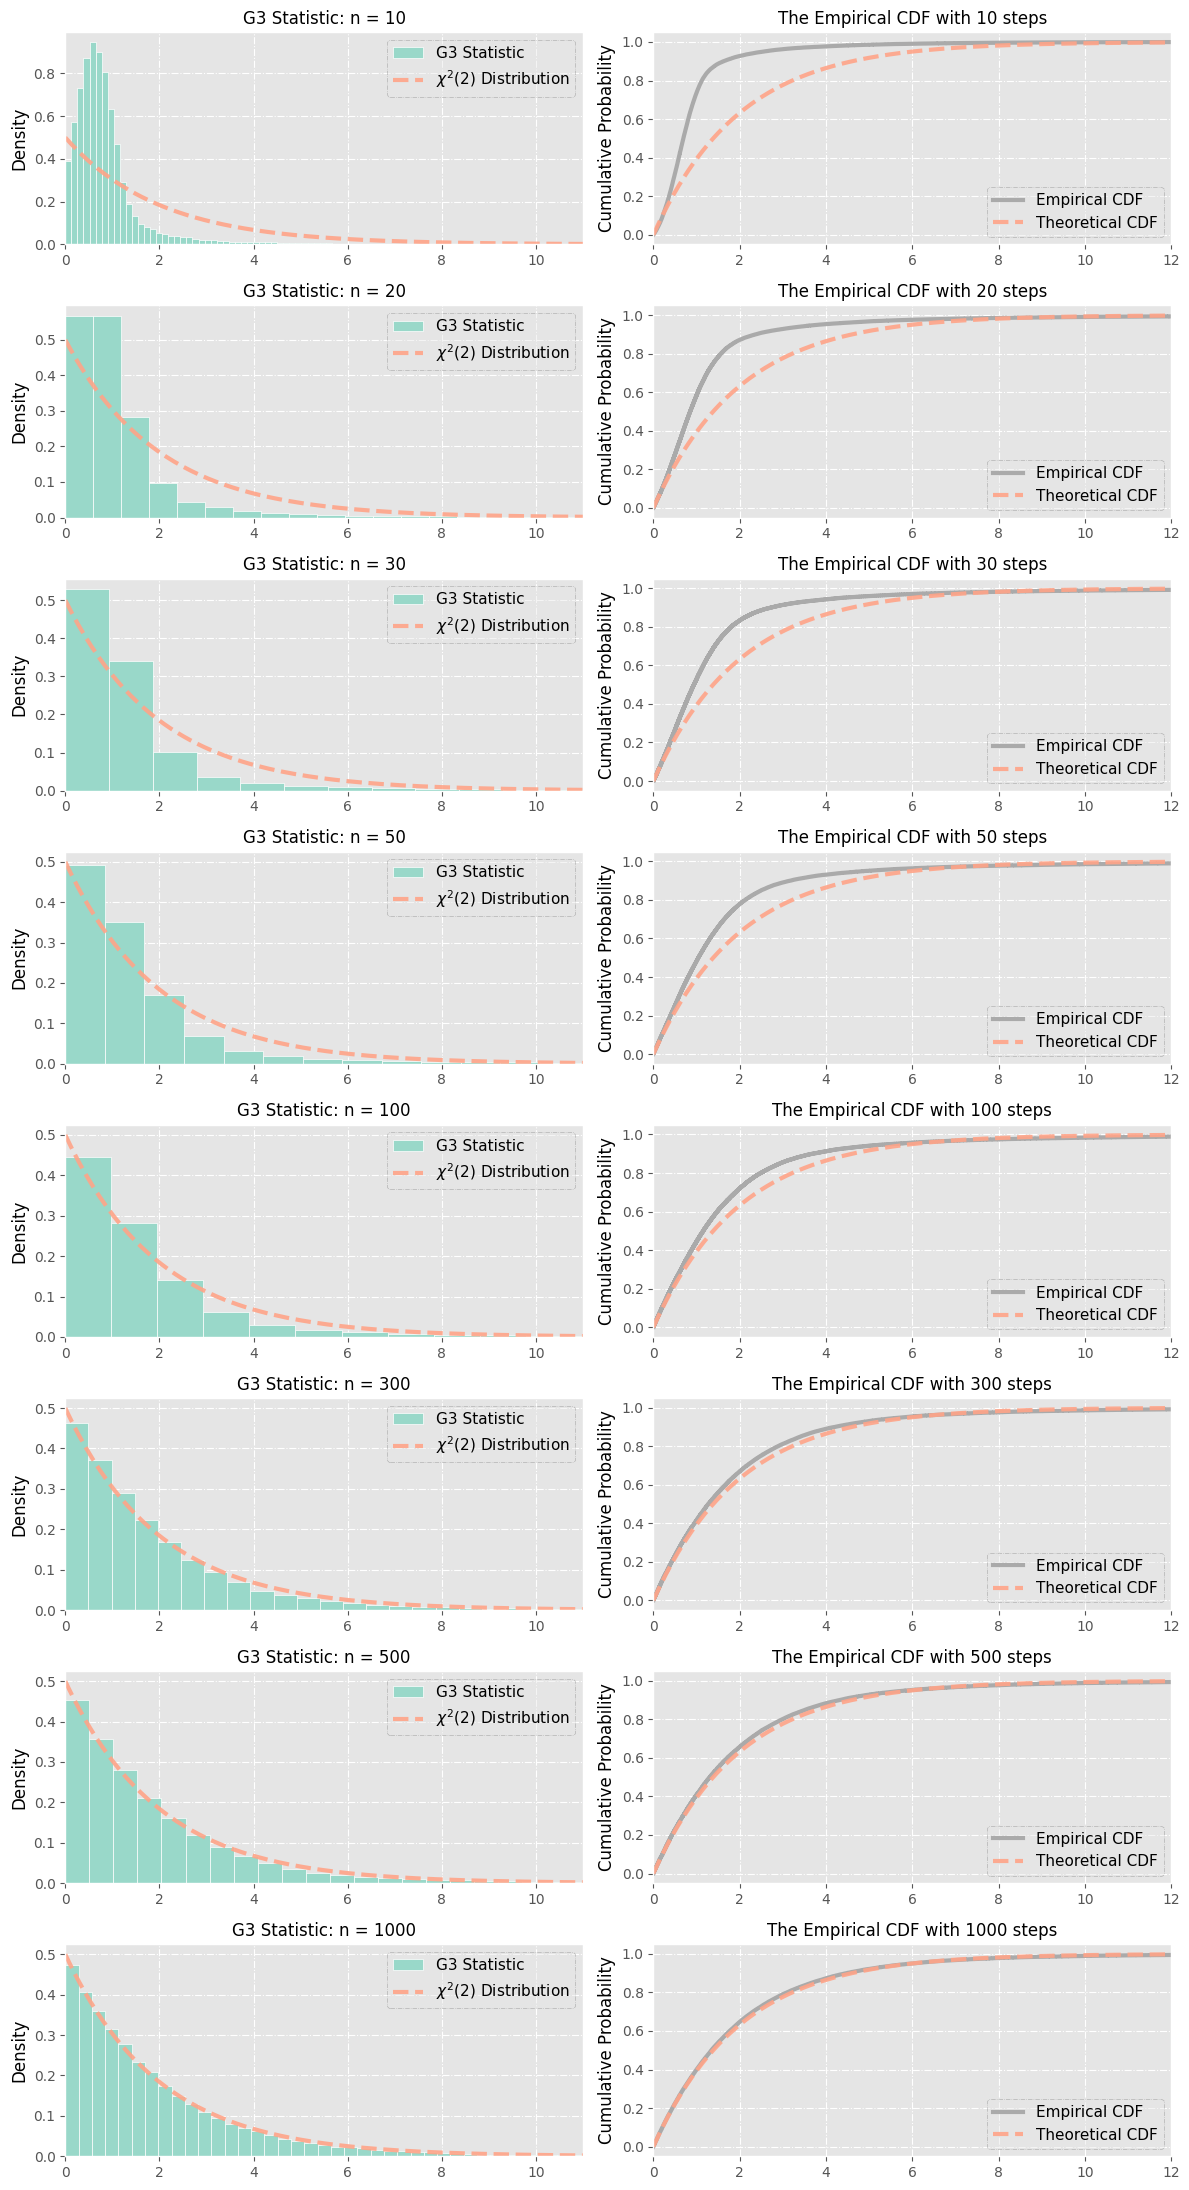

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, skew, kurtosis
from scipy.stats import norm, chi2

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000] # 要 2000 才會準
G3 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(8, 2, figsize = (12, 22))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for kurtosis
    x = norm.rvs(0, 1, (N, n))
    # 生成 G3 统计量
    s = skew(x, axis = 1, bias = True)
    k = kurtosis(x, axis = 1, bias = True, fisher = True)
    G3 = (n / 6) * ((s ** 2) + ((k ** 2) / 4))

    # chi(2) PDF
    x_pdf = np.linspace(min(G3), max(G3), 1000)
    y_pdf = chi2.pdf(x_pdf, 2)

    # 計算 G3 的 ECDF
    res = cumfreq(G3, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # chi(2) CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = chi2.cdf(x_cdf, 2)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G3 统计量的直方图與 chi(2) PDF
    ax_pdf.hist(G3, bins = 150, density = True, color = '#99d8c9', edgecolor = '#FFFFFF'
                , label = 'G3 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = '$\chi^2(2)$ Distribution'
                , alpha = 0.9)
    ax_pdf.set_xlim([0, 11])
    ax_pdf.set_title('G3 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')

    # G3 统计量的 ECDF 與 chi(2) CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_xlim([0, 12])
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_3$ 統計量的分佈與卡方分配 $\chi^2(2)$ 有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。
- 隨著樣本數 n 的增加，$G_3$ 統計量的分佈逐漸趨近於卡方分配 $\chi^2(2)$。當樣本數 n 增加到 300 或以上時，$G_3$ 統計量的分佈與卡方分配 $\chi^2(2)$ 幾乎相同。
- 在樣本數較大的情況下，$G_3$ 統計量的分佈與卡方分配 $\chi^2(2)$ 幾乎完全重合，這表明 $G_3$ 統計量在大樣本的情況下會無限趨近於卡方分配 $\chi^2(2)$。
- Empirical CDF 與卡方分配 $\chi^2(2)$ 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與卡方分配 $\chi^2(2)$ 越來越接近，這進一步證明了 $G_3$ 統計量在大樣本的情況下會無限趨近於卡方分配 $\chi^2(2)$。

**<font color=lightseagreen>結論</font>**：

- 通過以上實驗，證實了 $G_3$ 確實理論上服從卡方分配 $\chi^2(2)$，原因是它是由 $G_1^2$ + $G_2^2$ 所形成的，而 $G_1$、$G_2$ 各自服從標準常態 N(0, 1)，故各自做二次方，分佈會變成 $\chi^2(1)$，再相加，分佈最終形成 $\chi^2(2)$。
- 通過蒙地卡羅模擬實驗，我們驗證了由 Skewness 和 Kurtosis 結合形成的 $G_3$ 統計量在樣本數較大時，其分佈趨近於卡方分配 $\chi^2(2)$。
- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

### <strong><font color=cornflowerblue>目標二</font></strong>：從不同的母體分配中進行抽樣，用 $G_3$ 檢定統計量以蒙地卡羅模擬方式來進行檢定，驗證其在不同樣本數下的檢定力（Power）。

- 假設檢定（Jarque-Bera 檢定 or $G_3$ 統計量）:
$$ H_0: \text{資料來自常態分佈} $$
$$ H_a: \text{資料不來自常態分佈} $$

- 檢定統計量 $G_3$：
$$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\bigg(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\bigg) $$
其中 $\hat{s}$ 為偏態係數 skewness 的估計值，$\hat{k}$ 為峰態係數 Kurtosis 的估計值。

- Power:
$$P(Reject\; H_0 | Data \sim H_a) = 0.95$$

- Type I Error:
$$P(Reject\; H_0 | Data \sim H_0) = 0.05$$


#### **<font color=indianred>說明</font>**：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, chi2, uniform, t, f

def G3_stats(X):
    """
    Input:
        X: A numpy array of shape (N, n) where N is the number of samples and n is the size of each sample
    Output:
        G3: A numpy array of shape (N,) that contains the G3 statistic for each sample
        P_Val: A numpy array of shape (N,) that contains the p-value for each sample
    """
    n = X.shape[1]
    G1 = np.sqrt(n / 6) * skew(X, axis = 1, bias = False) # bias = False 表示 Unbiased
    G2 = np.sqrt(n / 24) * (kurtosis(X, axis = 1, bias = False, fisher = True))
    G3 = G1**2 + G2**2
    P_Val = 1 - chi2.cdf(G3, df = 2)  # chi2.cdf 是指從 0 到 G3 的面積，1 - chi2.cdf 是指從 G3 到無限大的面積
    return G3, P_Val

distributions = {
    'N(0, 1)': lambda size: norm.rvs(loc = 0, scale = 1, size = size),
    'T(3)': lambda size: t.rvs(df = 3, size = size),
    'T(10)': lambda size: t.rvs(df = 10, size = size),
    'T(30)': lambda size: t.rvs(df = 30, size = size),
    'Unif(0, 1)': lambda size: uniform.rvs(loc = 0, scale = 1, size = size),
    '$\chi^2(4)$': lambda size: chi2.rvs(df = 4, size = size),
    '$\chi^2(8)$': lambda size: chi2.rvs(df = 8, size = size),
    '$\chi^2(20)$': lambda size: chi2.rvs(df = 20, size = size),
    'F(10, 10)': lambda size: f.rvs(dfn = 10, dfd = 10, size = size),
    'F(50, 50)': lambda size: f.rvs(dfn = 50, dfd = 50, size = size)
}

def dist(dist_name, N, n):
    return distributions[dist_name]((N, n))


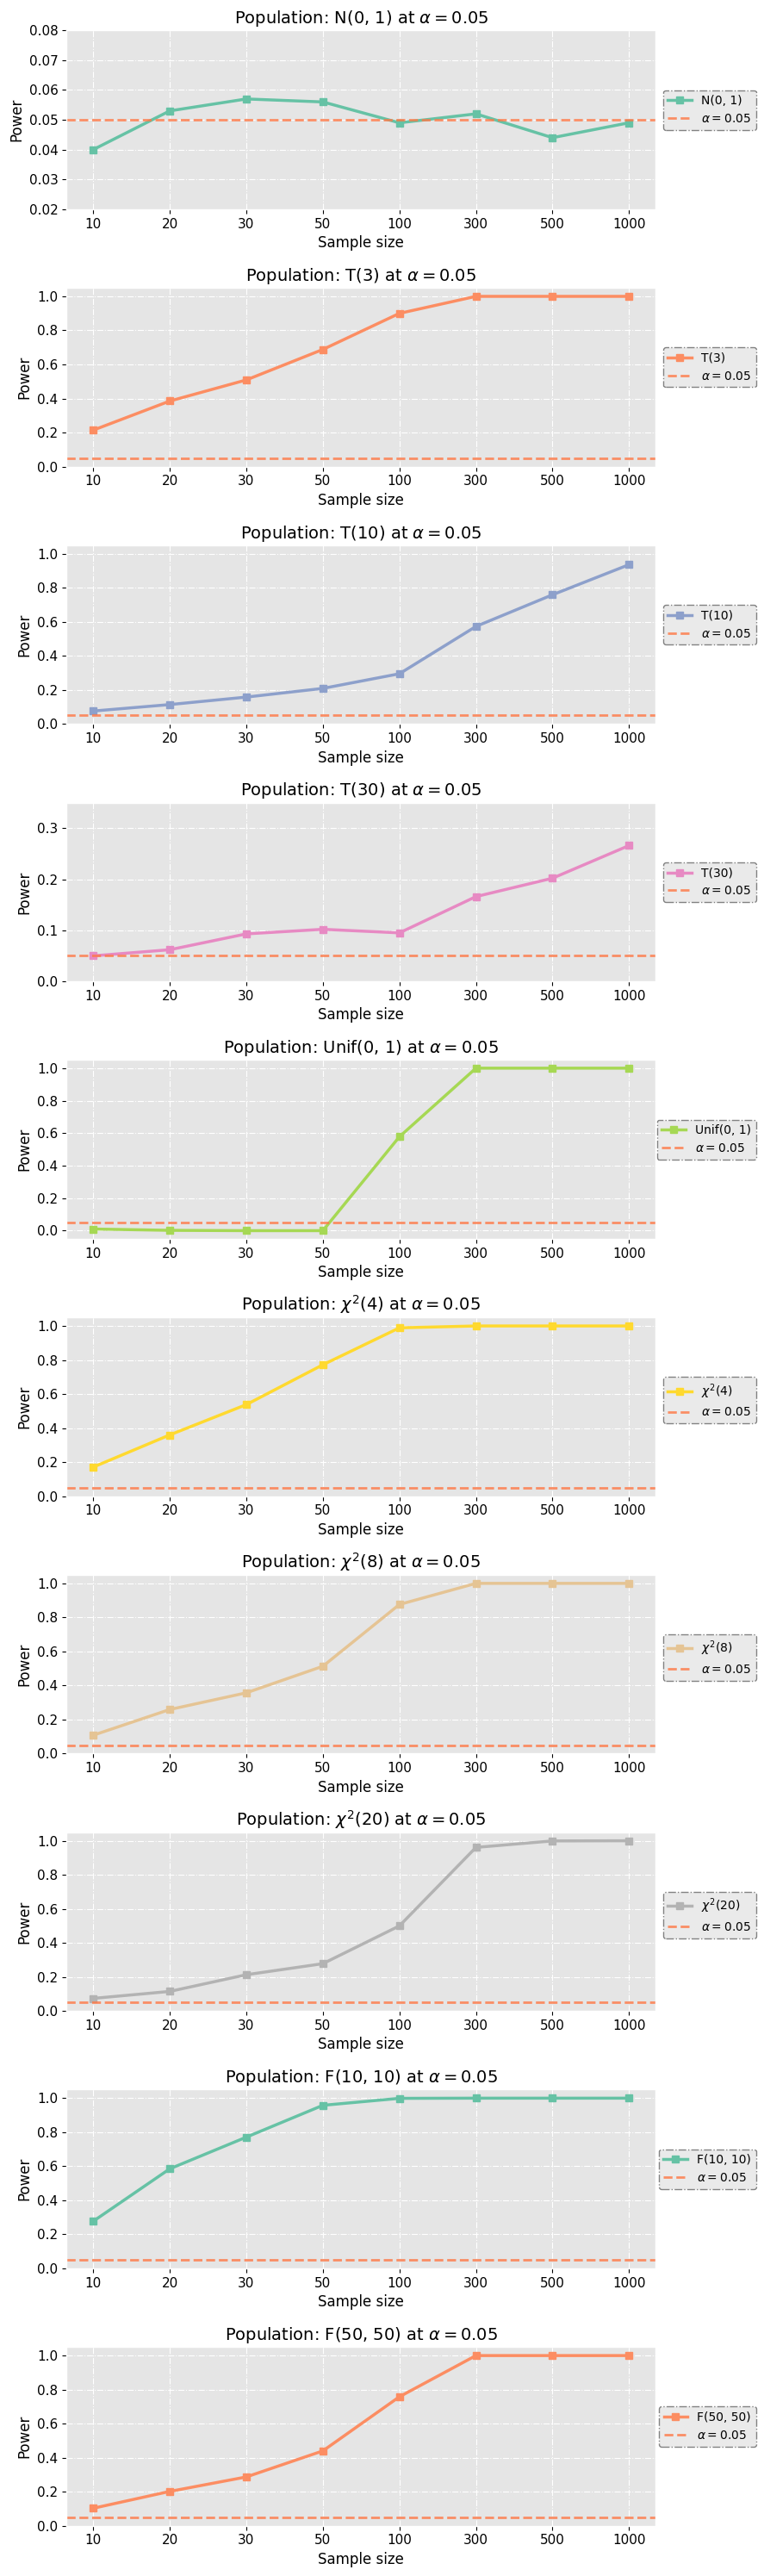

In [76]:
# 設定參數
N = 1000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
alpha = 0.05

# 繪圖設定
plt.style.use('ggplot')
fig, axs = plt.subplots(10, 1, figsize = (9, 30))
color = sns.color_palette('Set2', 10)
ylim_lower = [0.02, 0, 0, 0, -0.05, 0, 0, 0, 0, 0]
ylim_upper = [0.08, 1.05, 1.05, 0.35, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05]

# 開始繪圖
for j, dist_name in enumerate(distributions.keys()):
    power = np.zeros(len(n))
    for i in range(len(n)):
        x = dist(dist_name, N, n[i])
        G3, P_Val = G3_stats(x)
        power[i] = np.mean(P_Val < alpha)

    axs = axs.ravel()
    axs[j].plot(power, marker = 's', linestyle = '-', color = color[j], lw = 2.5, label = dist_name)
    axs[j].axhline(y = 0.05, color = '#FF7744', linestyle = '--', lw = 2, alpha = 0.8
                   , label = '$\\alpha = 0.05$')
    axs[j].set_xticks(np.arange(len(n)))
    axs[j].set_xticklabels(n)
    axs[j].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[j].set_ylabel('Power', fontsize = 12, color = 'black')
    axs[j].set_title('Population: ' + dist_name + ' at $\\alpha = 0.05$', fontsize = 14, color = 'black')
    axs[j].grid(True, linestyle = '-.')
    axs[j].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    axs[j].set_ylim([ylim_lower[j], ylim_upper[j]])
    legend = axs[j].legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666'
                            , loc = 'upper right', bbox_to_anchor = (1.18, 0.7))
    legend.get_frame().set_linestyle('-.')
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_alpha(0.8)

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：上面的分佈越像常態，檢定力越差

<hr>

#### **<font color=indianred>說明</font>**：

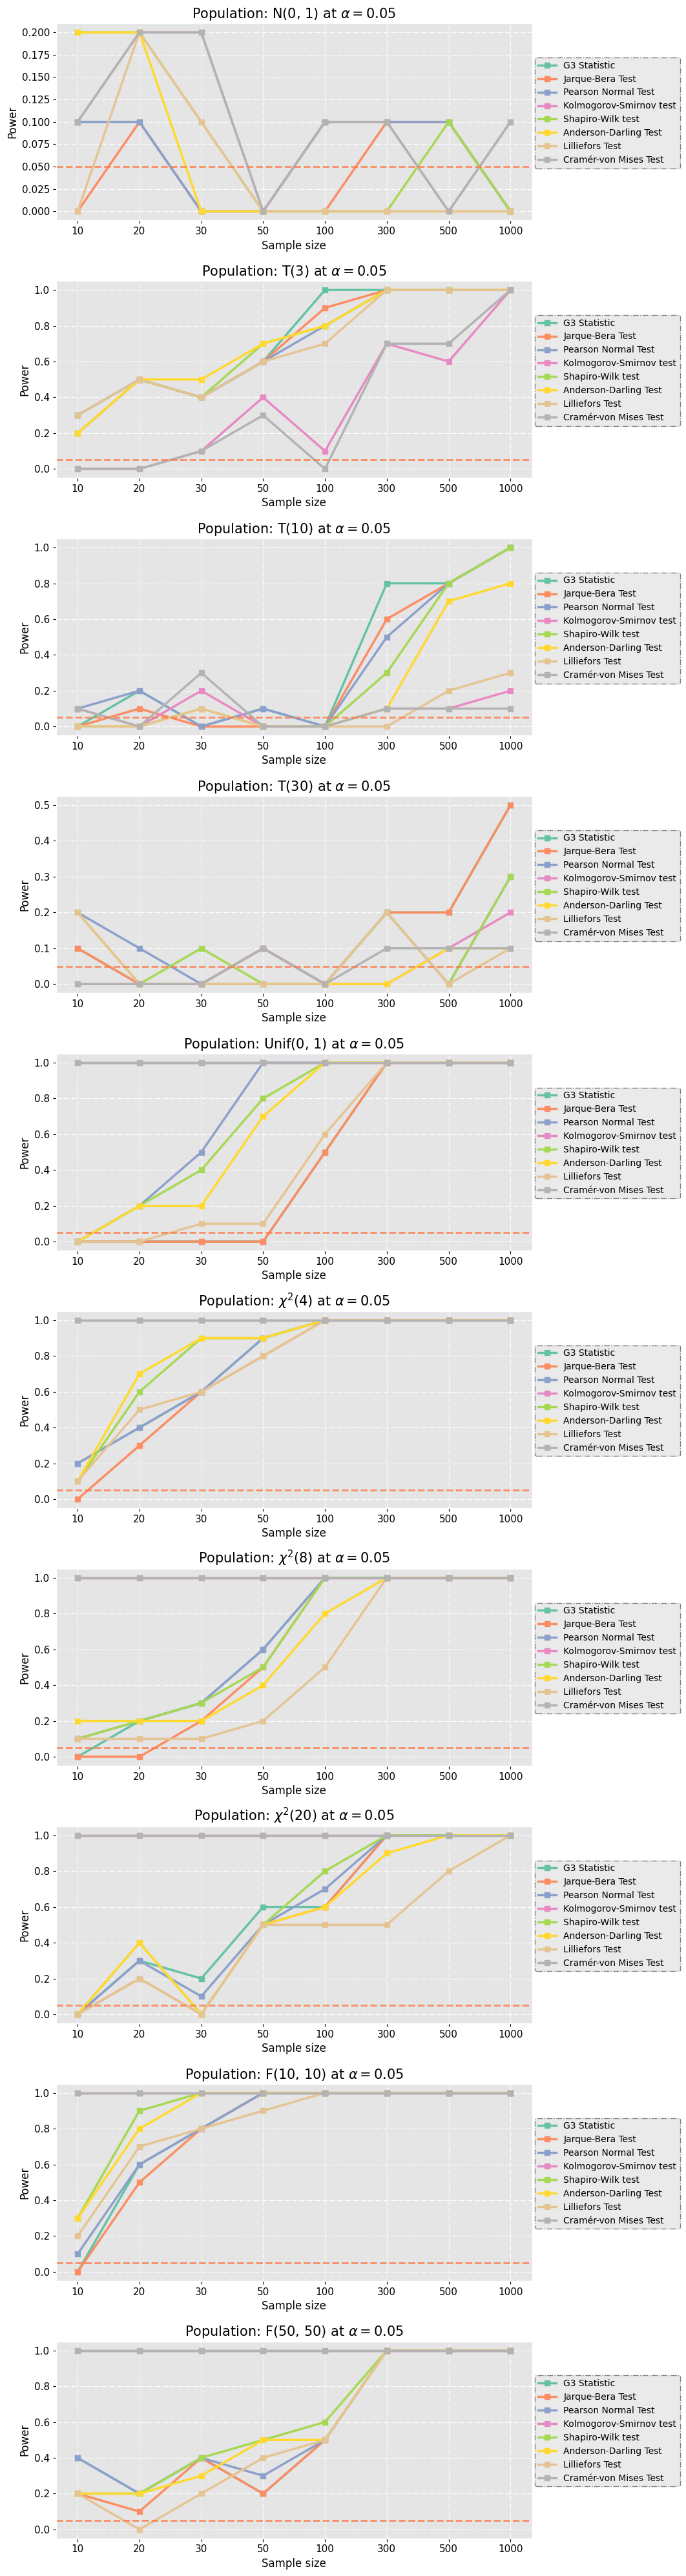

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera, normaltest, kstest, shapiro, anderson, cramervonmises
from statsmodels.stats.diagnostic import lilliefors
import warnings

# 忽略特定警告
warnings.filterwarnings("ignore")

# 設定參數
N = 10  # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000]  # sample size
alpha = 0.05

# 繪圖設定
plt.style.use('ggplot')
fig, axs = plt.subplots(10, 1, figsize = (11, 40))
def distplot(power, color, label):
    axs[k].plot(power, marker = 's', linestyle = '-', color = color, lw = 2.5, label = label)

# 開始繪圖
for k, dist_name in enumerate(distributions.keys()):

    # 初始化 power
    power_jb = np.zeros(len(n))
    power_G3 = np.zeros(len(n))
    power_nt = np.zeros(len(n))
    power_ks = np.zeros(len(n))
    power_sw = np.zeros(len(n))
    power_ad = np.zeros(len(n))
    power_lf = np.zeros(len(n))
    power_cv = np.zeros(len(n))

    # 計算 power for each sample size
    for i in range(len(n)):
        # 選擇分佈
        x = dist(dist_name, N, n[i])

        # 自己的 j-b test
        G3, P_Val = G3_stats(x)
        # scipy j-b test
        p_val_jb = jarque_bera(x, axis = 1)[1]
        # scipy normaltest
        stat_nt, p_val_nt = normaltest(x, axis = 1)
        # scipy kstest
        stat_ks = np.zeros(N)
        p_val_ks = np.zeros(N)
        for j in range(N):
            stat_ks[j], p_val_ks[j] = kstest(x[j], 'norm')
        # scipy shapiro test
        stat_sw = np.zeros(N)
        p_val_sw = np.zeros(N)
        for j in range(N):
            stat_sw[j], p_val_sw[j] = shapiro(x[j])
        # anderson-darling test
        stat_ad = np.zeros(N)
        critical_val_ad = np.zeros(N)
        for j in range(N):
            result = anderson(x[j], dist = 'norm')
            stat_ad[j] = result.statistic
            critical_val_ad[j] = result.critical_values[2]  # 第三個臨界值，為 5% 顯著性水平
        # lilliefors test
        p_val_lf = np.zeros(N)
        for j in range(N):
            _, p_val_lf[j] = lilliefors(x[j])
        # cramér-von mises test
        p_val_cv = np.zeros(N)
        for j in range(N):
            result_cv = cramervonmises(x[j], 'norm') # 設定為 'norm' 表示比較常態分佈
            p_val_cv[j] = result_cv.pvalue

        # 計算 power
        power_G3[i] = np.mean(P_Val < alpha)
        power_jb[i] = np.mean(p_val_jb < alpha)
        power_nt[i] = np.mean(p_val_nt < alpha)
        power_ks[i] = np.mean(p_val_ks < alpha)
        power_sw[i] = np.mean(p_val_sw < alpha)
        power_ad[i] = np.mean(stat_ad > critical_val_ad)  # 檢驗統計量 > 5% 的臨界值就 reject H0
        power_lf[i] = np.mean(p_val_lf < alpha)
        power_cv[i] = np.mean(p_val_cv < alpha)

    # 繪圖
    axs = axs.ravel()
    power = [power_G3, power_jb, power_nt, power_ks, power_sw, power_ad, power_lf, power_cv]
    color = sns.color_palette('Set2', 8)
    label = ['G3 Statistic', 'Jarque-Bera Test', 'Pearson Normal Test', 'Kolmogorov-Smirnov test'
                , 'Shapiro-Wilk test', 'Anderson-Darling Test', 'Lilliefors Test', 'Cramér-von Mises Test']
    for c in range(len(power)):
        distplot(power[c], color[c], label[c])
    axs[k].axhline(y = 0.05, color = '#FF7744', linestyle = '--', lw = 2, alpha = 0.8)
    axs[k].set_xticks(np.arange(len(n)))
    axs[k].set_xticklabels(n)
    axs[k].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[k].set_ylabel('Power', fontsize = 12, color = 'black')
    axs[k].set_title('Population: ' + dist_name + ' at $\\alpha = 0.05$', fontsize = 15, color = 'black')
    axs[k].grid(True, linestyle = '-.')
    axs[k].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    legend = axs[k].legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666'
                          , loc = 'upper right', bbox_to_anchor = (1.32, 0.85))
    legend.get_frame().set_linestyle('-.')
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_alpha(0.8)
    # axs[k].set_ylim([0, 0.1])

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：

<hr>